A city's skyline is the outer contour of the silhouette formed by all the buildings in that city when viewed from a distance. Given the locations and heights of all the buildings, return the skyline formed by these buildings collectively.

The geometric information of each building is given in the array buildings where buildings[i] = [lefti, righti, heighti]:

    lefti is the x coordinate of the left edge of the ith building.
    righti is the x coordinate of the right edge of the ith building.
    heighti is the height of the ith building.

You may assume all buildings are perfect rectangles grounded on an absolutely flat surface at height 0.

The skyline should be represented as a list of "key points" sorted by their x-coordinate in the form [[x1,y1],[x2,y2],...]. Each key point is the left endpoint of some horizontal segment in the skyline except the last point in the list, which always has a y-coordinate 0 and is used to mark the skyline's termination where the rightmost building ends. Any ground between the leftmost and rightmost buildings should be part of the skyline's contour.

Note: There must be no consecutive horizontal lines of equal height in the output skyline. For instance, [...,[2 3],[4 5],[7 5],[11 5],[12 7],...] is not acceptable; the three lines of height 5 should be merged into one in the final output as such: [...,[2 3],[4 5],[12 7],...]

Example 1:

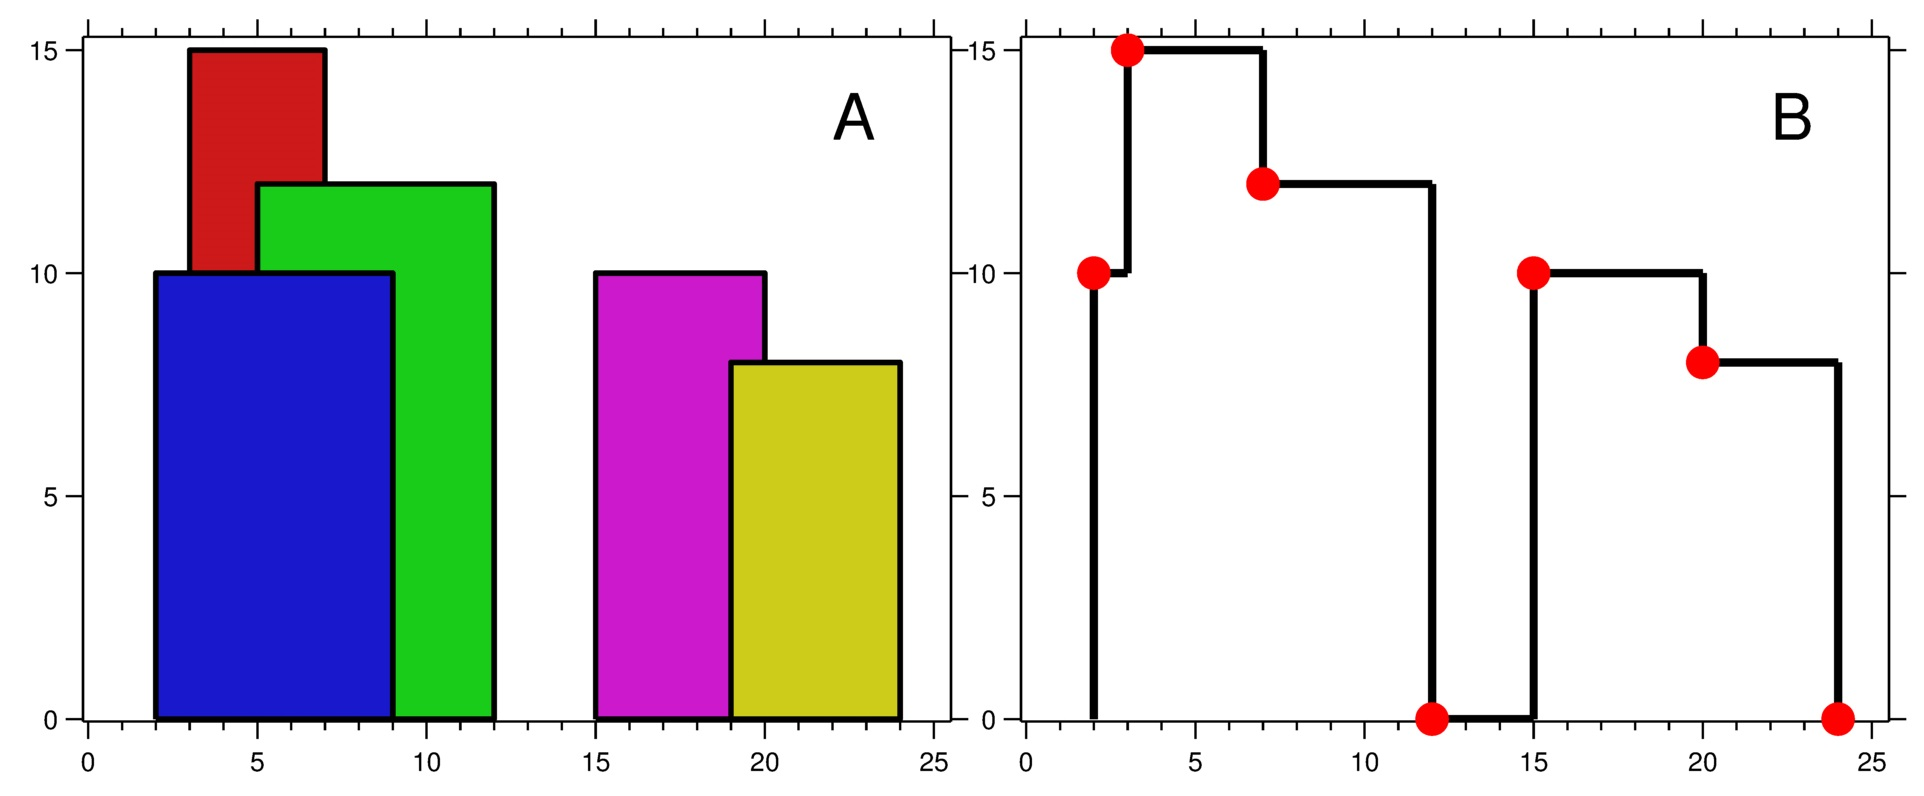!

Input: buildings = [[2,9,10],[3,7,15],[5,12,12],[15,20,10],[19,24,8]]
Output: [[2,10],[3,15],[7,12],[12,0],[15,10],[20,8],[24,0]]
Explanation:
Figure A shows the buildings of the input.
Figure B shows the skyline formed by those buildings. The red points in figure B represent the key points in the output list.

Example 2:

Input: buildings = [[0,2,3],[2,5,3]]
Output: [[0,3],[5,0]]

 

Constraints:

    1 <= buildings.length <= 104
    0 <= lefti < righti <= 231 - 1
    1 <= heighti <= 231 - 1
    buildings is sorted by lefti in non-decreasing order.



In [152]:
from typing import List

class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
        events = []
        # Signs are critically important!!! This is wrong
        # All heights additions are going after removals
        for l, r, h in buildings:
            events.append((l, h))
            events.append((r, -h))
        events = sorted(events)
        
        result = []
        curr_heights = [0]
        for coord, height in events:
            curr_max = max(curr_heights)
            if height > 0:
                curr_heights.append(height)
            else:
                curr_heights.pop(curr_heights.index(-height))
                
            if curr_max != max(curr_heights):
                result.append((coord, max(curr_heights)))
            # print(result)
        return result

In [153]:
from typing import List

class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
        events = []
        # Signs are critically important!!! This is correct
        # All heights additions are going before removals
        for l, r, h in buildings:
            events.append((l, -h))
            events.append((r, h))
        events = sorted(events)
        
        result = []
        curr_heights = [0]
        for coord, height in events:
            curr_max = max(curr_heights)
            if height < 0:
                curr_heights.append(-height)
            else:
                curr_heights.pop(curr_heights.index(height))
                
            if curr_max != max(curr_heights):
                result.append((coord, max(curr_heights)))
            # print(result)
        return result

In [154]:
s = Solution()
s.getSkyline([[2,9,10],[3,7,15],[5,12,12],[15,20,10],[19,24,8]])
# [[2,10],[3,15],[7,12],[12,0],[15,10],[20,8],[24,0]]

[(2, 10), (3, 15), (7, 12), (12, 0), (15, 10), (20, 8), (24, 0)]

In [155]:
s.getSkyline([[0,2,3],[2,5,3]])
# [[0,3],[5,0]]

[(0, 3), (5, 0)]

In [156]:
s.getSkyline([[0,3,3],[1,5,3],[2,4,3],[3,7,3]])
# [[0,3],[7,0]]

[(0, 3), (7, 0)]

In [157]:
s.getSkyline([[1,2,1],[1,2,2],[1,2,3],[2,3,1],[2,3,2],[2,3,3]])
# [[1, 3], [3, 0]]

[(1, 3), (3, 0)]

In [158]:
s.getSkyline([[3,7,8],[3,8,7],[3,9,6],[3,10,5],[3,11,4],[3,12,3],[3,13,2],[3,14,1]])
# [[3,8],[7,7],[8,6],[9,5],[10,4],[11,3],[12,2],[13,1],[14,0]]

[(3, 8), (7, 7), (8, 6), (9, 5), (10, 4), (11, 3), (12, 2), (13, 1), (14, 0)]